In [ ]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from google.colab import files
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import numpy
with open('/content/Data (3).txt') as f:
    lines = f.readlines()
lines = [x.replace("\n","") for x in lines if x != "\n"]
df = (pd.DataFrame(lines)).dropna()
messages_list = df.values.tolist()


In [ ]:
messages = []
msg = ""
for message_list in messages_list:
  for m in message_list:
    x = str(m)
    if "/" not in x:
      msg = msg + " " + x
    else:
      messages.append(msg)
      msg = x
len(messages)

42051

In [ ]:
key_words = ["gz","sqd", "yrds", "yards", "yds", "ghaz", "ghz", "foot", "feet", "ft", "sqft", "marla", "demand","price", "@", "IN HAND", "lac", "crore", "cr", "lakh", "lacs", "KANAL", "KANAN", "mrla", "AVAILABLE FOR SALE", "dha", "bahria", "clifton", "000"]
Messages = []

for ind, message in enumerate(messages):
  count = 0
  messages[ind] = messages[ind].replace("nan", "")
  for key in key_words:
    if key.lower() in message.lower():
      count = count + 1
  if count != 0:
    Messages.append(message)

messages = Messages

In [ ]:
for i in range(len(messages)):
  messages[i] = (messages[i]).lower()

#remove repetitions
messages = set(messages)
messages = list(messages)

ads = []
for n in range(len(messages)):
  data = messages[n].split('*')
  new = []
  count = 0
  for i in data:
    if count == 0:
      date = [(i.split(","))[0]]
    
    if i != "direct deal" and i!=" " and i!="" and count>0 and i:
      ads.append(date+[i])
    count += 1
ads1 = []
for ad in ads:
  if "_" not in ad[1]:
    ads1.append(ad)

area = ["precinct", "bahria heights", 'ali block', 'tower 21', "midway", "p23", "p24", "p30", "p32", "p34", "p15", "p27", "p26", "p15", "p25", "p15", "p6", "bahria town lahore"]
count = 0
for i in range(len(ads1)):
  for a in area:
    if ads1[i] != None:
      if a in ads1[i][1]:
        count += 1
        ads1[i] = ads1[i] + [ads1[i+1][1]]
ads2 = []
for i in ads1:
  if i != None and len(i) == 3:
    ads2.append(i)


In [ ]:
#ads3 = [date, area, ad]
ads3 = []
land = ["gz","sqd", "yrds", "yards", "yds", "ghaz", "ghz", "foot", "feet", "ft", "sqft", "marla", "KANAL", "KANAN", "mrla"]
price = ["demand","price", "@", "IN HAND", "lac", "crore", "cr", "lakh", "lacs", "AVAILABLE FOR SALE", "rs", "000"]

for ad in ads2:
  for l in land:
    for p in price:
      #print(ad[2])
      if (p.lower() in ad[2]) and (l.lower() in ad[2]):
        ads3.append([ad[0], ad[1], ad[2]])

len(ads3)

2287

In [ ]:
filters = ["extra", "rent", "60ft", "80ft", "2 to 14 ", "onc"]
ads4 = []
for i in ads3:
  count = 0
  for f in filters:
    if f in i[1] or f in i[2]:
      count+=1
  if count == 0:
    ads4.append(i)

ads3 = ads4
len(ads3)


712

In [ ]:
final = []
price = ""
land = ""
for i in ads3:
  if "lac" in i[2]:
    price = i[2][i[2].index("lac") - 8:i[2].index("lac") + len("lac")] 
  elif "demand" in i[2]:
    price = i[2][i[2].index("demand"):i[2].index("demand") + 15]
  elif "@" in i[2]:
    price = i[2][i[2].index("@"):i[2].index("@") + 15]
  if "yds" in i[2]:
    land = i[2][i[2].index("yds") - 8:i[2].index("yds") + 4]
  elif "sq yrds" in i[2]:
    land = i[2][i[2].index("sq yrds") - 8:i[2].index("sq yrds") + len("sq yrds")]
  elif "sq feet" in i[2]:
    land = i[2][i[2].index("sq feet") - 8:i[2].index("sq feet") + len("sq feet")]
  elif "sqft" in i[2]:
    land = i[2][i[2].index("sqft") - 8:i[2].index("sqft") + len("sqft")]
  elif "square yards" in i[2]:
    land = i[2][i[2].index("square yards") - 8:i[2].index("square yards") + len("square yards")]
  elif "yards" in i[2]:
    land = i[2][i[2].index("yards") - 8:i[2].index("yards") + len("yards")]
  elif "marla" in i[2]:
    land = i[2][i[2].index("marla") - 8:i[2].index("marla") + len("marla")]
  if land and price:
    final.append([i[0],i[1],land,price])
  
len(final)

filters = ["demand", "allotment", "i", "@", "👉", "(3+", "new deal cl", "mand", "demand...on cal", "final re", "👉🏻", "demand 9500sqft",
          "possession", "all", "clos", "and", "demand on call", "com", "visit any", "nd", "inal", "paid", "vis", "p15b plot", "po", "ssesson ", " ", "  ", "p-1", "ner", "ly"]

for i in range(len(final)):
  for f in filters:
    final[i][3] = (final[i][3]).replace(f, "")
    if 'k' in final[i][3]:
      final[i][3] = (final[i][3]).replace("k", "000")
    if '0🏻' in final[i][2]:
      final[i][3] = (final[i][3]).replace("0🏻", "0")

filters = ["oor", "0sr", "ng,", ",", "ng", "blvd", "loor", "(", "05", "rner", "nd", "and ", "i ", "a ", "sion  ", "l ", "per", "idn ", "hop "]
for i in range(len(final)):
  for f in filters:
    final[i][2] = (final[i][2]).replace(f, "")
for i in range(len(final)):
  if "sqyds" in final[i][2]:
    final[i][2] = final[i][2].replace("sqyds", "")
    final[i][2] = int(final[i][2])
  elif "square yards" in final[i][2]:
    final[i][2] = final[i][2].replace("square yards", "")
    final[i][2] = int(final[i][2])
  elif "sq yards" in final[i][2]:
    final[i][2] = final[i][2].replace("sq yards", "")
    final[i][2] = int(final[i][2])
  elif "yards" in final[i][2]:
    final[i][2] = final[i][2].replace("yards", "")
    final[i][2] = int(final[i][2])
  elif "sqft" in final[i][2]:
    final[i][2] = final[i][2].replace("sqft", "")
    final[i][2] = (float(final[i][2]))/9
  elif "sq feet" in final[i][2]:
    final[i][2] = final[i][2].replace("sq feet", "")
    final[i][2] = (float(final[i][2]))/9
  elif "marla" in final[i][2]:
    final[i][2] = final[i][2].replace("marla", "")
    final[i][2] = (float(final[i][2]))*30.25


ValueError: ignored

In [ ]:
final1 = []

filters = ["fnalr", "fnalo", "fnalre", "dem", "9500sqft", "72pup¶228t", ":onc", "onc", "lac", "e", ".on", "sal", "...al", "...", "ford", "/6897"]

for i in range(len(final)):
  for f in filters:
    if f in final[i][3]:
      final[i][3] = final[i][3].replace(f, "")
for i in range(len(final)):
  
    if final[i][3]!="":
      final1.append(final[i]) 
final = final1

for i in range(len(final)):
  if final[i][3][-1] == ".":
    final[i][3][-1] == final[i][3][:-1]

for i in range(len(final)):
      if "cr" in final[i][3]:
        final[i][3] = (float(final[i][3].replace("cr", "")))*100

for i in range(len(final)):
  final[i][3] = float(final[i][3])

final.pop(162)

final1 = []
for i in range(len(final)):
  # print(len(final[i]))
  if final[i][0] != "" and final[i][1] != "" and final[i][2] != "" and len(final[i]) == 4 and final[i][0] != "plot 1654":
    if final[i][2] != 0:
      final1.append([final[i][0], final[i][1], final[i][2], final[i][3], final[i][3]/final[i][2]])

final = final1

In [ ]:
precinct_4_5_6_bahria_heights = []
precinct_23_25_25a_27_27a = []
precinct_32 = []
ali_block = []
midway_commercial = []
p61_62_63 = []
precinct_11a_villa = []

for i in range(len(final)):
    if "precinct 4" in final[i][1] or "precinct 5" in final[i][1] or "precinct 6" in final[i][1] or "bahria heights" in final[i][1]:
      precinct_4_5_6_bahria_heights.append(final[i])
    if "precinct 25" in final[i][1] or "p23" in final[i][1] or "p25" in final[i][1] or "p25a" in final[i][1] or "p27" in final[i][1] or "p27a" in final[i][1]:
      precinct_23_25_25a_27_27a.append(final[i])
    if "p32" in final[i][1]:
      precinct_32.append(final[i])
    if "ali block" in final[i][1]:
      ali_block.append(final[i])
    if "midway" in final[i][1]:
      midway_commercial.append(final[i]) 
    if "p61" in final[i][1] or "p62" in final[i][1] or "p63" in final[i][1]:
      p61_62_63.append(final[i])
    if "precinct 11a villa" in final[i][1]:
      precinct_11a_villa.append(final[i])
    
#ALL UNIQUE LOCATION
locations = ["precinct 4", "ali block", "bahria heights", "midway b", "midway commercial", "midwaycommercial a", "p23", "p25", "p25a", "p27", "p27a", "p32", "p61", "p62", "p63", "precinct 11a villa", "precinct 25", "precinct 5", "precinct 6"]

final.pop(518)
final.pop(518)
final.pop(518)

dates = []
location  = [] 
size  = []
price = []
price_yard = []

for i in range(len(precinct_4_5_6_bahria_heights)):
  dates.append(datetime.strptime(precinct_4_5_6_bahria_heights[i][0], "%d/%m/%Y"))
  location.append(precinct_4_5_6_bahria_heights[i][1])
  size.append(precinct_4_5_6_bahria_heights[i][2])
  price.append(precinct_4_5_6_bahria_heights[i][3])
  price_yard.append(precinct_4_5_6_bahria_heights[i][4])

data = pd.DataFrame({
    'dates': dates, 'location': location, 'size': size, 'price': price, 'price_yard': price_yard
})

precinct_4_5_6_bahria_heights = data.sort_values(by=['dates'], ascending=True)

dates = []
location  = [] 
size  = []
price = []
price_yard = []
for i in range(len(precinct_23_25_25a_27_27a)):
  
  dates.append(datetime.strptime(precinct_23_25_25a_27_27a[i][0], "%d/%m/%Y"))
  location.append(precinct_23_25_25a_27_27a[i][1])
  size.append(precinct_23_25_25a_27_27a[i][2])
  price.append(precinct_23_25_25a_27_27a[i][3])
  price_yard.append(precinct_23_25_25a_27_27a[i][4])

data = pd.DataFrame({
    'dates': dates, 'location': location, 'size': size, 'price': price, 'price_yard': price_yard
})

precinct_23_25_25a_27_27a = data.sort_values(by=['dates'], ascending=True)

dates = []
location  = [] 
size  = []
price = []
price_yard = []
for i in range(len(precinct_32)):
  
  dates.append(datetime.strptime(precinct_32[i][0], "%d/%m/%Y"))
  location.append(precinct_32[i][1])
  size.append(precinct_32[i][2])
  price.append(precinct_32[i][3])
  price_yard.append(precinct_32[i][4])

data = pd.DataFrame({
    'dates': dates, 'location': location, 'size': size, 'price': price, 'price_yard': price_yard
})

precinct_32 = data.sort_values(by=['dates'], ascending=True)

dates = []
location  = [] 
size  = []
price = []
price_yard = []

for i in range(len(ali_block)):
  dates.append(datetime.strptime(ali_block[i][0], "%d/%m/%Y"))
  location.append(ali_block[i][1])
  size.append(ali_block[i][2])
  price.append(ali_block[i][3])
  price_yard.append(ali_block[i][4])

data = pd.DataFrame({
    'dates': dates, 'location': location, 'size': size, 'price': price, 'price_yard': price_yard
})

ali_block = data.sort_values(by=['dates'], ascending=True)

dates = []
location  = [] 
size  = []
price = []
price_yard = []

for i in range(len(midway_commercial)):
  dates.append(datetime.strptime(midway_commercial[i][0], "%d/%m/%Y"))
  location.append(midway_commercial[i][1])
  size.append(midway_commercial[i][2])
  price.append(midway_commercial[i][3])
  price_yard.append(midway_commercial[i][4])

data = pd.DataFrame({
    'dates': dates, 'location': location, 'size': size, 'price': price, 'price_yard': price_yard
})

midway_commercial = data.sort_values(by=['dates'], ascending=True)

dates = []
location  = [] 
size  = []
price = []
price_yard = []

for i in range(len(p61_62_63)):
  dates.append(datetime.strptime(p61_62_63[i][0], "%d/%m/%Y"))
  location.append(p61_62_63[i][1])
  size.append(p61_62_63[i][2])
  price.append(p61_62_63[i][3])
  price_yard.append(p61_62_63[i][4])

data = pd.DataFrame({
    'dates': dates, 'location': location, 'size': size, 'price': price, 'price_yard': price_yard
})

p61_62_63 = data.sort_values(by=['dates'], ascending=True)

dates = []
location  = [] 
size  = []
price = []
price_yard = []

for i in range(len(precinct_11a_villa)):
  dates.append(datetime.strptime(precinct_11a_villa[i][0], "%d/%m/%Y"))
  location.append(precinct_11a_villa[i][1])
  size.append(precinct_11a_villa[i][2])
  price.append(precinct_11a_villa[i][3])
  price_yard.append(precinct_11a_villa[i][4])

data = pd.DataFrame({
    'dates': dates, 'location': location, 'size': size, 'price': price, 'price_yard': price_yard
})

precinct_11a_villa = data.sort_values(by=['dates'], ascending=True)




Average error: 26.981%


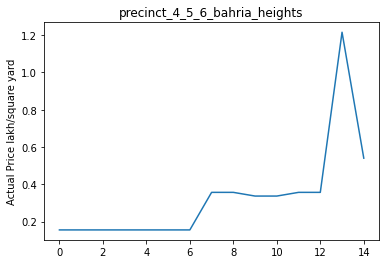

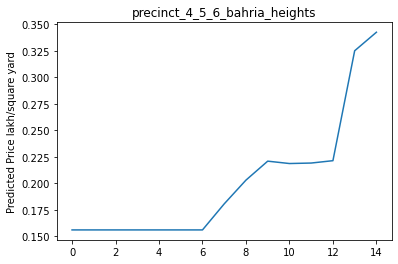

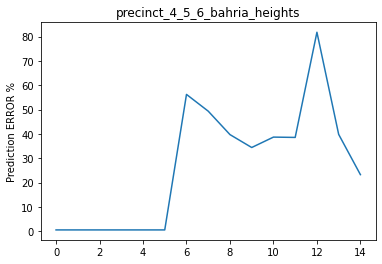

In [ ]:
TRAIN = list(precinct_4_5_6_bahria_heights["price_yard"][0:int(len(precinct_4_5_6_bahria_heights)*(2/3))])
TEST = list(precinct_4_5_6_bahria_heights["price_yard"][int(len(precinct_4_5_6_bahria_heights)*(2/3)):])

#average error when test data input, one at a time
 
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# define input sequence
raw_seq = TRAIN
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)
# demonstrate prediction

y_prediction_1 = []
errors_1 = []
for i in range(len(TEST)-3):
	x_input = array(TEST[i:i+3])
	x_input = x_input.reshape((1, n_steps, n_features))
	y = model.predict(x_input, verbose=0) 
	y_prediction_1.append(float(y[0][0]))
	error = abs(TEST[i+3] - float(y[0][0]))/TEST[i+3]
	errors_1.append(error)

avg_error = numpy.mean(errors_1)*100

print("Average error: " + str(avg_error)[0:6] + "%")

#ACTUAL

plt.plot(TEST[2:-1])
plt.title("precinct_4_5_6_bahria_heights")
plt.ylabel('Actual Price lakh/square yard')
#plt.xlabel('Month')
ax = plt.gca()
#ax.set_ylim([3100, 3600])
plt.show()

#PREDICTION

plt.title("precinct_4_5_6_bahria_heights")
plt.plot(y_prediction_1)
plt.ylabel('Predicted Price lakh/square yard')
#plt.xlabel('')
ax = plt.gca()
#ax.set_ylim([3100, 3600])
plt.show()

#ERROR

errors = [element * 100 for element in errors_1]
plt.plot(errors) 
plt.title("precinct_4_5_6_bahria_heights")
plt.ylabel('Prediction ERROR %')
#plt.xlabel('Month')
plt.show()

Average error: 57.116%


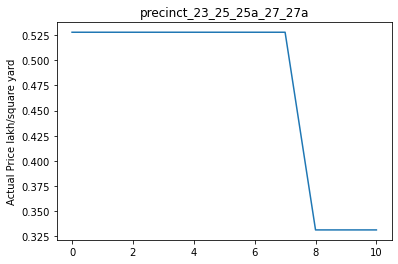

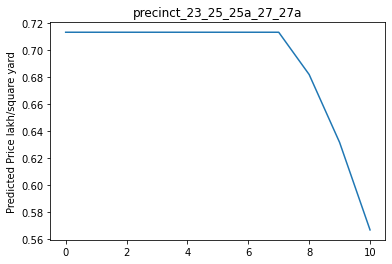

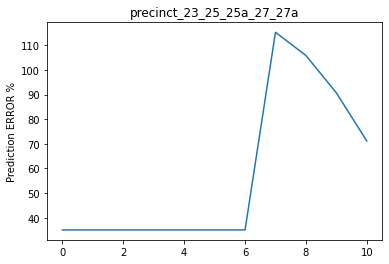

In [ ]:
TRAIN = list(precinct_23_25_25a_27_27a["price_yard"][0:int(len(precinct_23_25_25a_27_27a)*(2/3))])
TEST = list(precinct_23_25_25a_27_27a["price_yard"][int(len(precinct_23_25_25a_27_27a)*(2/3)):])

#average error when test data input, one at a time
 
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# define input sequence
raw_seq = TRAIN
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)
# demonstrate prediction

y_prediction_1 = []
errors_1 = []
for i in range(len(TEST)-3):
	x_input = array(TEST[i:i+3])
	x_input = x_input.reshape((1, n_steps, n_features))
	y = model.predict(x_input, verbose=0) 
	y_prediction_1.append(float(y[0][0]))
	error = abs(TEST[i+3] - float(y[0][0]))/TEST[i+3]
	errors_1.append(error)

avg_error = numpy.mean(errors_1)*100

print("Average error: " + str(avg_error)[0:6] + "%")

#ACTUAL

plt.plot(TEST[2:-1])
plt.title("precinct_23_25_25a_27_27a")
plt.ylabel('Actual Price lakh/square yard')
#plt.xlabel('Month')
ax = plt.gca()
#ax.set_ylim([3100, 3600])
plt.show()

#PREDICTION

plt.title("precinct_23_25_25a_27_27a")
plt.plot(y_prediction_1)
plt.ylabel('Predicted Price lakh/square yard')
#plt.xlabel('')
ax = plt.gca()
#ax.set_ylim([3100, 3600])
plt.show()

#ERROR

errors = [element * 100 for element in errors_1]
plt.plot(errors) 
plt.title("precinct_23_25_25a_27_27a")
plt.ylabel('Prediction ERROR %')
#plt.xlabel('Month')
plt.show()

Average error: 3.2348%


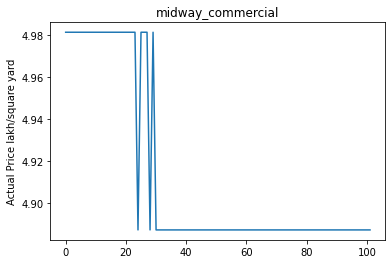

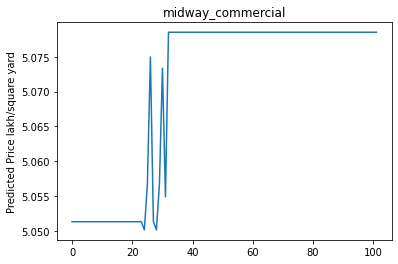

In [ ]:
TRAIN = list(midway_commercial["price_yard"][0:int(len(midway_commercial)*(2/3))])
TEST = list(midway_commercial["price_yard"][int(len(midway_commercial)*(2/3)):])

#average error when test data input, one at a time

 
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# define input sequence
raw_seq = TRAIN
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)
# demonstrate prediction

y_prediction_1 = []
errors_1 = []
for i in range(len(TEST)-3):
	x_input = array(TEST[i:i+3])
	x_input = x_input.reshape((1, n_steps, n_features))
	y = model.predict(x_input, verbose=0) 
	y_prediction_1.append(float(y[0][0]))
	error = abs(TEST[i+3] - float(y[0][0]))/TEST[i+3]
	errors_1.append(error)

avg_error = numpy.mean(errors_1)*100

print("Average error: " + str(avg_error)[0:6] + "%")

#ACTUAL

plt.plot(TEST[2:-1])
plt.title("midway_commercial")
plt.ylabel('Actual Price lakh/square yard')
#plt.xlabel('Month')
ax = plt.gca()
#ax.set_ylim([3100, 3600])
plt.show()

#PREDICTION

plt.title("midway_commercial")
plt.plot(y_prediction_1)
plt.ylabel('Predicted Price lakh/square yard')
#plt.xlabel('')
ax = plt.gca()
#ax.set_ylim([3100, 3600])
plt.show()

#ERROR

errors = [element * 100 for element in errors_1]
plt.plot(errors) 
plt.title("midway_commercial")
plt.ylabel('Prediction ERROR %')
#plt.xlabel('Month')
plt.show()

Average error: 2272.3%


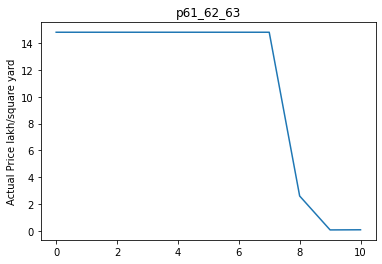

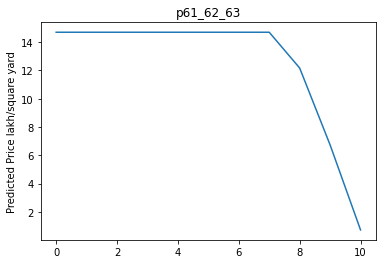

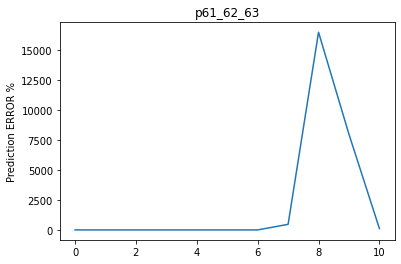

In [ ]:
TRAIN = list(p61_62_63["price_yard"][0:int(len(p61_62_63)*(2/3))])
TEST = list(p61_62_63["price_yard"][int(len(p61_62_63)*(2/3)):])

#average error when test data input, one at a time

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# define input sequence
raw_seq = TRAIN
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)
# demonstrate prediction

y_prediction_1 = []
errors_1 = []
for i in range(len(TEST)-3):
	x_input = array(TEST[i:i+3])
	x_input = x_input.reshape((1, n_steps, n_features))
	y = model.predict(x_input, verbose=0) 
	y_prediction_1.append(float(y[0][0]))
	error = abs(TEST[i+3] - float(y[0][0]))/TEST[i+3]
	errors_1.append(error)

avg_error = numpy.mean(errors_1)*100

print("Average error: " + str(avg_error)[0:6] + "%")

#ACTUAL

plt.plot(TEST[2:-1])
plt.title("p61_62_63")
plt.ylabel('Actual Price lakh/square yard')
#plt.xlabel('Month')
ax = plt.gca()
#ax.set_ylim([3100, 3600])
plt.show()

#PREDICTION

plt.title("p61_62_63")
plt.plot(y_prediction_1)
plt.ylabel('Predicted Price lakh/square yard')
#plt.xlabel('')
ax = plt.gca()
#ax.set_ylim([3100, 3600])
plt.show()

#ERROR

errors = [element * 100 for element in errors_1]
plt.plot(errors) 
plt.title("p61_62_63")
plt.ylabel('Prediction ERROR %')
#plt.xlabel('Month')
plt.show()

Average error: 5.5800%


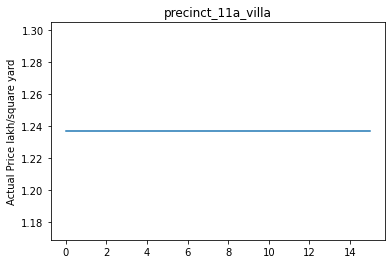

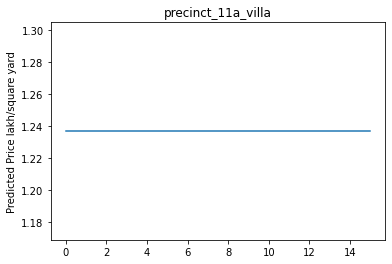

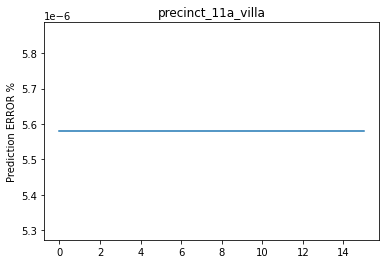

In [ ]:
TRAIN = list(precinct_11a_villa["price_yard"][0:int(len(precinct_11a_villa)*(2/3))])
TEST = list(precinct_11a_villa["price_yard"][int(len(precinct_11a_villa)*(2/3)):])

#average error when test data input, one at a time
 
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# define input sequence
raw_seq = TRAIN
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)
# demonstrate prediction

y_prediction_1 = []
errors_1 = []
for i in range(len(TEST)-3):
	x_input = array(TEST[i:i+3])
	x_input = x_input.reshape((1, n_steps, n_features))
	y = model.predict(x_input, verbose=0) 
	y_prediction_1.append(float(y[0][0]))
	error = abs(TEST[i+3] - float(y[0][0]))/TEST[i+3]
	errors_1.append(error)

avg_error = numpy.mean(errors_1)*100

print("Average error: " + str(avg_error)[0:6] + "%")

#ACTUAL

plt.plot(TEST[2:-1])
plt.title("precinct_11a_villa")
plt.ylabel('Actual Price lakh/square yard')
#plt.xlabel('Month')
ax = plt.gca()
#ax.set_ylim([3100, 3600])
plt.show()

#PREDICTION

plt.title("precinct_11a_villa")
plt.plot(y_prediction_1)
plt.ylabel('Predicted Price lakh/square yard')
#plt.xlabel('')
ax = plt.gca()
#ax.set_ylim([3100, 3600])
plt.show()

#ERROR

errors = [element * 100 for element in errors_1]
plt.plot(errors) 
plt.title("precinct_11a_villa")
plt.ylabel('Prediction ERROR %')
#plt.xlabel('Month')
plt.show()

Average error: 0.1149%


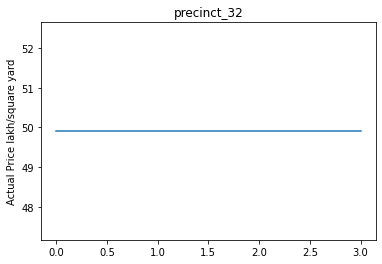

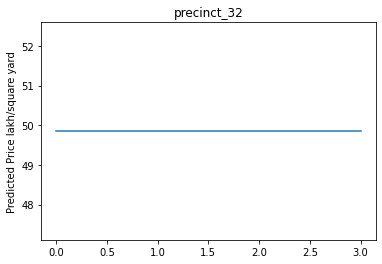

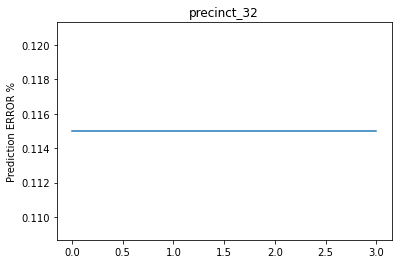

In [ ]:
TRAIN = list(precinct_32["price_yard"][0:int(len(precinct_32)*(2/3))])
TEST = list(precinct_32["price_yard"][int(len(precinct_32)*(2/3)):])

#average error when test data input, one at a time
 
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# define input sequence
raw_seq = TRAIN
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)
# demonstrate prediction

y_prediction_1 = []
errors_1 = []
for i in range(len(TEST)-3):
	x_input = array(TEST[i:i+3])
	x_input = x_input.reshape((1, n_steps, n_features))
	y = model.predict(x_input, verbose=0) 
	y_prediction_1.append(float(y[0][0]))
	error = abs(TEST[i+3] - float(y[0][0]))/TEST[i+3]
	errors_1.append(error)

avg_error = numpy.mean(errors_1)*100

print("Average error: " + str(avg_error)[0:6] + "%")

#ACTUAL

plt.plot(TEST[2:-1])
plt.title("precinct_32")
plt.ylabel('Actual Price lakh/square yard')
#plt.xlabel('Month')
ax = plt.gca()
#ax.set_ylim([3100, 3600])
plt.show()

#PREDICTION

plt.title("precinct_32")
plt.plot(y_prediction_1)
plt.ylabel('Predicted Price lakh/square yard')
#plt.xlabel('')
ax = plt.gca()
#ax.set_ylim([3100, 3600])
plt.show()

#ERROR

errors = [element * 100 for element in errors_1]
plt.plot(errors) 
plt.title("precinct_32")
plt.ylabel('Prediction ERROR %')
#plt.xlabel('Month')
plt.show()